In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np 
import pandas as pd 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
from sklearn.utils import shuffle 
from collections import Counter 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
import keras
from keras.utils import to_categorical
import os
from keras.layers import *
from keras.models import Sequential, Model
from keras import optimizers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def parse_arff(filename):
	try:
		file = open(filename)
	except:
		print('file could not found or opened, try with file location')
	columns = []
	data = []

	for line in file:
		if line.startswith('@attribute'):
			line = line.strip()
			temp = line.split()
			columns.append(temp[1])
		elif line.startswith('@') or line.startswith('\n'):
			continue
		else:
			line = line.strip()
			temp = line.split(',')
			data.append(temp)

	return data,columns

In [ ]:
test_sizes = [0.15, 0.20, 0.30, 0.35]

In [ ]:
data, columns = parse_arff('drive/MyDrive/content/Training Dataset.arff')
df = pd.DataFrame(data, columns = columns, dtype=np.int8)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df[df.columns[:-1]],df[df.columns[-1]], test_size = 0.3)

In [ ]:
x_train = np.array(x_train).astype(np.int8)
y_train = np.array(y_train).astype(np.int8)
x_test = np.array(x_test).astype(np.int8)
y_test = np.array(y_test).astype(np.int8)
y_train = np.where(y_train == -1, 0, y_train)
y_test = np.where(y_test == -1, 0, y_test)

In [ ]:
x_train_cat = to_categorical(x_train)
x_test_cat = to_categorical(x_test)

In [ ]:
combkernel = []
combdecision = []
combgamma = []
for kernel in kernels:
    for decision in decision_function_shape:
        for gam in gamma:
            for deg in degree:
                for c in C:
                  combkernel.append(kernel)
                  combdecision.append(decision+' '+kernel)
                  combgamma.append(gam+' '+kernel)

In [ ]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
C = [1, 2, 3, 4, 5] # regularization parameter
degree = [1, 2, 3, 4, 5, 6] # polinomial degree
gamma = ['scale', 'auto']
decision_function_shape = ['ovo', 'ovr']
#SVC

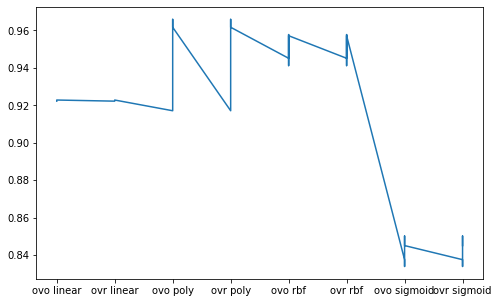

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(combdecision, acc_svc)
plt.show()

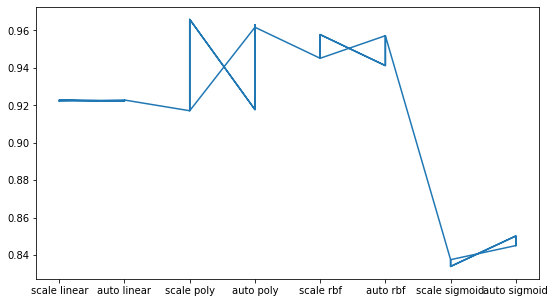

In [ ]:
plt.figure(figsize=(9,5))
plt.plot(combgamma, acc_svc)
plt.show()

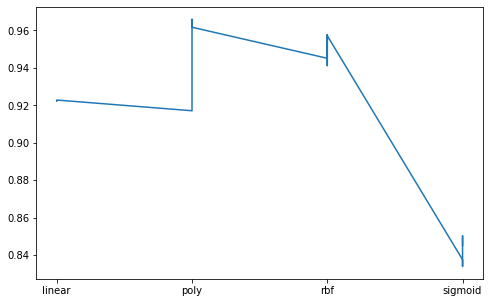

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(combkernel, acc_svc)
plt.show()

In [ ]:
svc_models = []
for kernel in kernels:
    for decision in decision_function_shape:
        for gam in gamma:
            for deg in degree:
                for c in C:
                    svc_models.append(SVC(kernel = kernel, C = c, degree = deg, gamma = gam, decision_function_shape=decision).fit(x_train, y_train))

In [ ]:
losses = ['hinge', 'squared_hinge']
penalty = ['l2']
C = [1, 2, 3, 4, 5] # regularization parameter
multi_class = ['ovr', 'crammer_singer']
#LİNEARSVC LinearSVC(loss = loss, penalty = pen, C = c, multi_class = multi).fit(x_train, y_train)

In [ ]:
combloss = []
combmulti = []
for loss in losses:
    for c in C:
        for multi in multi_class:
              combloss.append(loss + ' ' + str(c))
              combmulti.append(multi + ' ' + str(c))

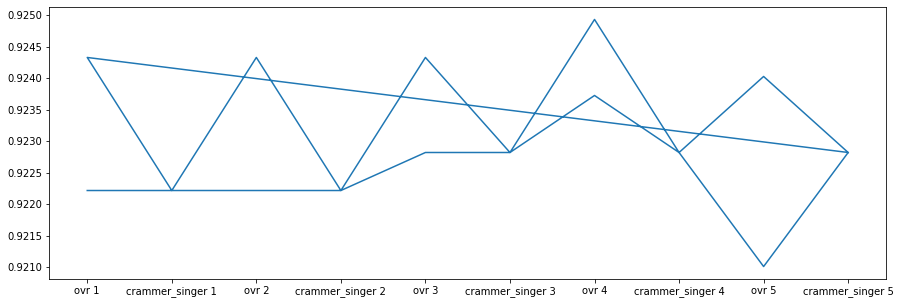

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(combmulti, acc_linearsvc)
plt.show()

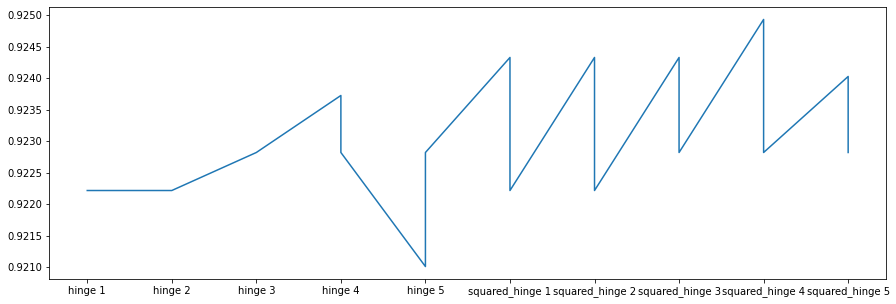

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(combloss, acc_linearsvc)
plt.show()

In [ ]:
linearsvc_model = []
for loss in losses:
    for pen in penalty:
        for c in C:
            for multi in multi_class:
                linearsvc_model.append(LinearSVC(loss = loss, penalty = pen, C = c, multi_class = multi).fit(x_train, y_train))

In [ ]:
acc_svc = []
acc_linearsvc = []

for model in svc_models:
    acc_svc.append(accuracy_score(y_test, model.predict(x_test)))

for model in linearsvc_model:
    acc_linearsvc.append(accuracy_score(y_test, model.predict(x_test)))

In [ ]:
weights = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
metric = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']

In [ ]:
combmetric = []
combalgo = []
comb=[]
for k in range(1, 10):
    for weight in weights:
        for algo in algorithm:
            for m in metric:
              combmetric.append(m)
              combalgo.append(str(k) + ' ' + algo)


In [ ]:
knn = []
for k in range(1, 10):
    for weight in weights:
        for algo in algorithm:
            for m in metric:
                knn.append(KNeighborsClassifier(n_neighbors=k, weights = weight, algorithm = algo, metric=m).fit(x_train, y_train))

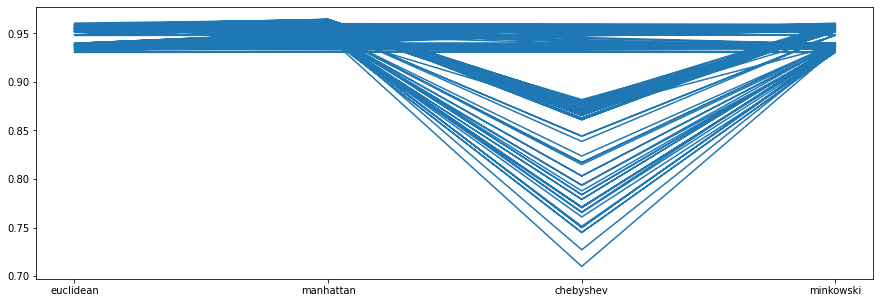

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(combmetric, acc_knn)
plt.show()

In [ ]:
acc_knn = []
for model in knn:
    acc_knn.append(accuracy_score(y_test, model.predict(x_test)))

In [ ]:
gaus = GaussianNB().fit(x_train, y_train)
accuracy_score(y_test, gaus.predict(x_test))

0.5925256178420736

In [ ]:
alpha = [0,1.,2.,3.,4.,5.,7.,9.,11.]
binarize = [0,1.,2.,3.,4.,5.,7.,9.,11.] #BernoulliNB
fit_prior = [True, False]

In [ ]:
bnbcomb = []
for a in alpha:
    for b in binarize:
        for fit in fit_prior:
          bnbcomb.append(str(a) + ' ' + str(b))

In [ ]:
bnbmodels = []
for a in alpha:
    for b in binarize:
        for fit in fit_prior:
            bnbmodels.append(BernoulliNB(alpha = a, binarize = b, fit_prior = fit).fit(x_train, y_train))

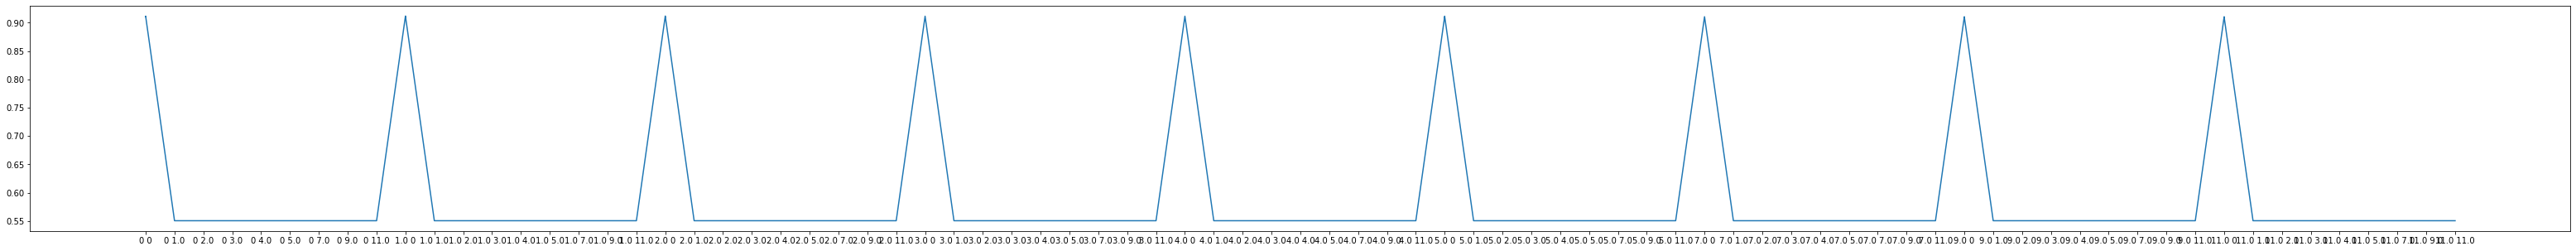

In [ ]:
plt.figure(figsize=(55,5))
plt.plot(bnbcomb, bnbacc)
plt.show()

In [ ]:
bnbacc = []
for model in bnbmodels:
    bnbacc.append(accuracy_score(y_test, model.predict(x_test)))

In [ ]:
max_features = [None, 'auto', 'sqrt', 'log2']
criterion = ['gini', 'entropy']
splitter = ['best', 'random']
bootstrap  = [True, False]
class_weight = [None, 'balanced', 'balanced_subsample']
warm_start = [True, False]

In [ ]:
randomforest_acc = []
for weight in class_weight:
  for max in max_features:
    for cri in criterion:
      for s in warm_start:
        randomforest_acc.append(accuracy_score(y_test, RandomForestClassifier(warm_start = s, class_weight=weight, max_features = max , criterion = cri).fit(x_train, y_train).predict(x_test)))

In [ ]:
dtree_acc = []
for weight in class_weight[:-1]:
  for max in max_features:
    for cri in criterion:
      for split in splitter:
        dtree_acc.append(accuracy_score(y_test, DecisionTreeClassifier(class_weight = weight, max_features=max, splitter = split, criterion = cri).fit(x_train, y_train).predict(x_test)))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df[df.columns[:-1]],df[df.columns[-1]], test_size = test_sizes[2])
x_train = np.array(x_train).astype(np.int8)
y_train = np.array(y_train).astype(np.int8)
x_test = np.array(x_test).astype(np.int8)
y_test = np.array(y_test).astype(np.int8)
y_train = np.where(y_train == -1, 0, y_train)
y_test = np.where(y_test == -1, 0, y_test)

In [ ]:
svc_models_test2 = []
for kernel in kernels:
    for c in C:
        for deg in degree:
            for gam in gamma:
                for decision in decision_function_shape:
                    svc_models_test2.append(SVC(kernel = kernel, C = c, degree = deg, gamma = gam, decision_function_shape=decision).fit(x_train, y_train))

In [ ]:
linearsvc_modeltest2 = []
for loss in losses:
    for pen in penalty:
        for c in C:
            for multi in multi_class:
                linearsvc_modeltest2.append(LinearSVC(loss = loss, penalty = pen, C = c, multi_class = multi).fit(x_train, y_train))

In [ ]:
acc_svctest2 = []
acc_linearsvctest2 = []

for model in svc_models:
    acc_svctest2.append(accuracy_score(y_test, model.predict(x_test)))

for model in linearsvc_model:
    acc_linearsvctest2.append(accuracy_score(y_test, model.predict(x_test)))

In [ ]:
knntest2 = []
for k in range(1, 10):
    for weight in weights:
        for algo in algorithm:
            for m in metric:
                knntest2.append(KNeighborsClassifier(n_neighbors=k, weights = weight, algorithm = algo, metric=m).fit(x_train, y_train))

In [ ]:
acc_knntest2 = []
for model in knn:
    acc_knntest2.append(accuracy_score(y_test, model.predict(x_test)))

In [ ]:
gaustest2 = GaussianNB().fit(x_train, y_train)
accuracy_score(y_test, gaustest2.predict(x_test))

0.6047633403678022

In [ ]:
bnbmodelstest2 = []
for a in alpha:
    for b in binarize:
        for fit in fit_prior:
            bnbmodelstest2.append(BernoulliNB(alpha = a, binarize = b, fit_prior = fit).fit(x_train, y_train))

In [ ]:
bnbacctest2 = []
for model in bnbmodels:
    bnbacctest2.append(accuracy_score(y_test, model.predict(x_test)))

In [ ]:
randomforest_acctest2 = []
for weight in class_weight:
  for max in max_features:
    for cri in criterion:
      for s in warm_start:
        randomforest_acctest2.append(accuracy_score(y_test, RandomForestClassifier(warm_start = s, class_weight=weight, max_features = max , criterion = cri).fit(x_train, y_train).predict(x_test)))


randomforest_acctest2.append(accuracy_score(y_test, RandomForestClassifier().fit(x_train, y_train).predict(x_test)))

In [ ]:
dtree_acctest2 = []
for weight in class_weight[:-1]:
  for max in max_features:
    for cri in criterion:
      for split in splitter:
        dtree_acctest2.append(accuracy_score(y_test, DecisionTreeClassifier(class_weight = weight, max_features=max, splitter = split, criterion = cri).fit(x_train, y_train).predict(x_test)))


dtree_acctest2.append(accuracy_score(y_test, DecisionTreeClassifier().fit(x_train, y_train).predict(x_test)))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df[df.columns[:-1]],df[df.columns[-1]], test_size = test_sizes[3])
x_train = np.array(x_train).astype(np.int8)
y_train = np.array(y_train).astype(np.int8)
x_test = np.array(x_test).astype(np.int8)
y_test = np.array(y_test).astype(np.int8)
y_train = np.where(y_train == -1, 0, y_train)
y_test = np.where(y_test == -1, 0, y_test)

In [ ]:
svc_models_test3 = []
for kernel in kernels:
    for c in C:
        for deg in degree:
            for gam in gamma:
                for decision in decision_function_shape:
                    svc_models_test3.append(SVC(kernel = kernel, C = c, degree = deg, gamma = gam, decision_function_shape=decision).fit(x_train, y_train))

In [ ]:
linearsvc_modeltest3 = []
for loss in losses:
    for pen in penalty:
        for c in C:
            for multi in multi_class:
                linearsvc_modeltest3.append(LinearSVC(loss = loss, penalty = pen, C = c, multi_class = multi).fit(x_train, y_train))

In [ ]:
acc_svctest3 = []
acc_linearsvctest3 = []

for model in svc_models:
    acc_svctest3.append(accuracy_score(y_test, model.predict(x_test)))

for model in linearsvc_model:
    acc_linearsvctest3.append(accuracy_score(y_test, model.predict(x_test)))

In [ ]:
knntest3 = []
for k in range(1, 10):
    for weight in weights:
        for algo in algorithm:
            for m in metric:
                knntest3.append(KNeighborsClassifier(n_neighbors=k, weights = weight, algorithm = algo, metric=m).fit(x_train, y_train))

In [ ]:
acc_knntest3 = []
for model in knn:
    acc_knntest3.append(accuracy_score(y_test, model.predict(x_test)))

In [ ]:
gaustest3 = GaussianNB().fit(x_train, y_train)
accuracy_score(y_test, gaustest3.predict(x_test))

0.599483204134367

In [ ]:
bnbmodelstest3 = []
for a in alpha:
    for b in binarize:
        for fit in fit_prior:
            bnbmodelstest3.append(BernoulliNB(alpha = a, binarize = b, fit_prior = fit).fit(x_train, y_train))

In [ ]:
bnbacctest3 = []
for model in bnbmodels:
    bnbacctest3.append(accuracy_score(y_test, model.predict(x_test)))

In [ ]:
randomforest_acctest3 = []
for weight in class_weight:
  for max in max_features:
    for cri in criterion:
      for s in warm_start:
        randomforest_acctest3.append(accuracy_score(y_test, RandomForestClassifier(warm_start = s, class_weight=weight, max_features = max , criterion = cri).fit(x_train, y_train).predict(x_test)))


randomforest_acctest3.append(accuracy_score(y_test, RandomForestClassifier().fit(x_train, y_train).predict(x_test)))

In [ ]:
dtree_acctest3 = []
for weight in class_weight[:-1]:
  for max in max_features:
    for cri in criterion:
      for split in splitter:
        dtree_acctest3.append(accuracy_score(y_test, DecisionTreeClassifier(class_weight = weight, max_features=max, splitter = split, criterion = cri).fit(x_train, y_train).predict(x_test)))


dtree_acctest3.append(accuracy_score(y_test, DecisionTreeClassifier().fit(x_train, y_train).predict(x_test)))

In [ ]:
#ACCURACYS #ACCURACYS #ACCURACYS #ACCURACYS #ACCURACYS #ACCURACYS
#ACCURACYS #ACCURACYS #ACCURACYS #ACCURACYS #ACCURACYS #ACCURACYS
#ACCURACYS #ACCURACYS #ACCURACYS #ACCURACYS #ACCURACYS #ACCURACYS
#ACCURACYS #ACCURACYS #ACCURACYS #ACCURACYS #ACCURACYS #ACCURACYS
#ACCURACYS #ACCURACYS #ACCURACYS #ACCURACYS #ACCURACYS #ACCURACYS

In [ ]:
np.sum(acc_svc), np.argmax(acc_svc), acc_svc[np.argmax(acc_svc)], np.argmin(acc_svc), acc_svc[np.argmin(acc_svc)], np.sum(acc_svc) / len(acc_svc)

(438.8378541289933,
 232,
 0.9644364074743822,
 456,
 0.8264014466546112,
 0.9142455294354027)

In [ ]:
svc_comb = []
for kernel in kernels:
    for c in C:
        for deg in degree:
            for gam in gamma:
                for decision in decision_function_shape:
                    svc_comb.append(kernel + ' ' +  str(c) + ' ' + str(deg) + ' ' + gam + ' ' + decision)

In [ ]:
svc_comb[232], svc_comb[456], svc_comb[236], svc_comb[408], svc_comb[236], svc_comb[408]

('poly 5 5 scale ovo',
 'sigmoid 5 1 scale ovo',
 'poly 5 6 scale ovo',
 'sigmoid 3 1 scale ovo',
 'poly 5 6 scale ovo',
 'sigmoid 3 1 scale ovo')

In [ ]:
np.sum(acc_svctest2), np.argmax(acc_svctest2), acc_svctest2[np.argmax(acc_svctest2)], np.argmin(acc_svctest2), acc_svctest2[np.argmin(acc_svctest2)], np.sum(acc_svctest2) / len(acc_svctest2)

(443.62918299668377,
 236,
 0.9810069339764848,
 408,
 0.8378052457039493,
 0.9242274645764245)

In [ ]:
np.sum(acc_svctest3), np.argmax(acc_svctest3), acc_svctest3[np.argmax(acc_svctest3)], np.argmin(acc_svctest3), acc_svctest3[np.argmin(acc_svctest3)], np.sum(acc_svctest3) / len(acc_svctest3)

(441.51162790697674,
 236,
 0.9803617571059432,
 408,
 0.827906976744186,
 0.9198158914728682)

In [ ]:
np.sum(acc_linearsvc), np.argmax(acc_linearsvc), acc_linearsvc[np.argmax(acc_linearsvc)], np.argmin(acc_linearsvc), acc_linearsvc[np.argmin(acc_linearsvc)], np.sum(acc_linearsvc) / len(acc_linearsvc)

(18.467751657625072,
 10,
 0.9240506329113924,
 0,
 0.9222423146473779,
 0.9233875828812537)

In [ ]:
linear_svc_comb = []
for loss in losses:
    for pen in penalty:
        for c in C:
            for multi in multi_class:
              linear_svc_comb.append(loss + ' ' + pen + ' ' + str(c) + ' ' + multi)

In [ ]:
linear_svc_comb[10], linear_svc_comb[0], linear_svc_comb[8], linear_svc_comb[6], linear_svc_comb[10], linear_svc_comb[0]

('squared_hinge l2 1 ovr',
 'hinge l2 1 ovr',
 'hinge l2 5 ovr',
 'hinge l2 4 ovr',
 'squared_hinge l2 1 ovr',
 'hinge l2 1 ovr')

In [ ]:
np.sum(acc_linearsvctest2), np.argmax(acc_linearsvctest2), acc_linearsvctest2[np.argmax(acc_linearsvctest2)], np.argmin(acc_linearsvctest2), acc_linearsvctest2[np.argmin(acc_linearsvctest2)], np.sum(acc_linearsvctest2) / len(acc_linearsvctest2)

(18.617726861621946,
 8,
 0.9315646668676515,
 6,
 0.9303587579137775,
 0.9308863430810973)

In [ ]:
np.sum(acc_linearsvctest3), np.argmax(acc_linearsvctest3), acc_linearsvctest3[np.argmax(acc_linearsvctest3)], np.argmin(acc_linearsvctest3), acc_linearsvctest3[np.argmin(acc_linearsvctest3)], np.sum(acc_linearsvctest3) / len(acc_linearsvctest3)

(18.566925064599484,
 10,
 0.9297157622739018,
 0,
 0.9279069767441861,
 0.9283462532299742)

In [ ]:
np.sum(acc_knn), np.argmax(acc_knn), acc_knn[np.argmax(acc_knn)], np.argmin(acc_knn), acc_knn[np.argmin(acc_knn)], np.sum(acc_knn) / len(acc_knn)

(264.5804701627486,
 253,
 0.9614225437010248,
 226,
 0.7118746232670283,
 0.9186821880650994)

In [ ]:
knn_comb = []
for k in range(1, 10):
    for weight in weights:
        for algo in algorithm:
            for m in metric:
              knn_comb.append(str(k) + ' ' + weight + ' ' + algo + ' ' + m)

In [ ]:
knn_comb[253], knn_comb[226], knn_comb[145], knn_comb[226], knn_comb[145], knn_comb[226],

('8 distance brute manhattan',
 '8 uniform auto chebyshev',
 '5 distance auto manhattan',
 '8 uniform auto chebyshev',
 '5 distance auto manhattan',
 '8 uniform auto chebyshev')

In [ ]:
np.sum(acc_knntest2), np.argmax(acc_knntest2), acc_knntest2[np.argmax(acc_knntest2)], np.argmin(acc_knntest2), acc_knntest2[np.argmin(acc_knntest2)], np.sum(acc_knntest2) / len(acc_knntest2)

(276.4796502864034,
 145,
 0.9852276153150437,
 226,
 0.7817304793488091,
 0.9599987857166785)

In [ ]:
np.sum(acc_knntest3), np.argmax(acc_knntest3), acc_knntest3[np.argmax(acc_knntest3)], np.argmin(acc_knntest3), acc_knntest3[np.argmin(acc_knntest3)], np.sum(acc_knntest3) / len(acc_knntest3)

(276.0573643410853,
 145,
 0.9844961240310077,
 226,
 0.7708010335917312,
 0.9585325150732129)

In [ ]:
np.sum(bnbacc), np.argmax(bnbacc), bnbacc[np.argmax(bnbacc)], np.argmin(bnbacc), bnbacc[np.argmin(bnbacc)], np.sum(bnbacc) / len(bnbacc)

(98.54309825195901,
 0,
 0.8993369499698614,
 2,
 0.566003616636528,
 0.6045588849813436)

In [ ]:
bnb_comb = []
for a in alpha:
    for b in binarize:
        for fit in fit_prior:
          bnb_comb.append(str(a) + ' ' + str(b) + ' ' + str(fit))

In [ ]:
bnb_comb[0], bnb_comb[2], bnb_comb[1], bnb_comb[2], bnb_comb[54], bnb_comb[2]

('0 0 True',
 '0 1.0 True',
 '0 0 False',
 '0 1.0 True',
 '3.0 0 True',
 '0 1.0 True')

In [ ]:
np.sum(bnbacctest2), np.argmax(bnbacctest2), bnbacctest2[np.argmax(bnbacctest2)], np.argmin(bnbacctest2), bnbacctest2[np.argmin(bnbacctest2)], np.sum(bnbacctest2) / len(bnbacctest2)

(97.91950557732895,
 1,
 0.9086523967440459,
 2,
 0.5601447090744649,
 0.6007331630510978)

In [ ]:
np.sum(bnbacctest3), np.argmax(bnbacctest3), bnbacctest3[np.argmax(bnbacctest3)], np.argmin(bnbacctest3), bnbacctest3[np.argmin(bnbacctest3)], np.sum(bnbacctest3) / len(bnbacctest3)

(97.16976744186044,
 54,
 0.9082687338501292,
 2,
 0.5550387596899224,
 0.5961335425881009)

In [ ]:
np.sum(randomforest_acc), np.argmax(randomforest_acc), randomforest_acc[np.argmax(randomforest_acc)], np.argmin(randomforest_acc), randomforest_acc[np.argmin(randomforest_acc)], np.sum(randomforest_acc) / len(randomforest_acc)

(47.5328511151296,
 7,
 0.9734779987944545,
 18,
 0.9668474984930681,
 0.9700581860230532)

In [ ]:
randomforest_comb = []
for weight in class_weight:
  for max in max_features:
    for cri in criterion:
      for s in warm_start:
        randomforest_comb.append(str(weight) + ' ' + str(max) + ' ' + str(cri) + ' ' + str(s))

In [ ]:
randomforest_comb[7], randomforest_comb[18], randomforest_comb[14], randomforest_comb[34], randomforest_comb[12], randomforest_comb[0]

('None auto entropy False',
 'balanced None entropy True',
 'None log2 entropy True',
 'balanced_subsample None entropy True',
 'None log2 gini True',
 'None None gini True')

In [ ]:
np.sum(randomforest_acctest2), np.argmax(randomforest_acctest2), randomforest_acctest2[np.argmax(randomforest_acctest2)], np.argmin(randomforest_acctest2), randomforest_acctest2[np.argmin(randomforest_acctest2)], np.sum(randomforest_acctest2) / len(randomforest_acctest2)

(47.39674404582455,
 14,
 0.969550798914682,
 34,
 0.9650286403376545,
 0.9672804907311132)

In [ ]:
np.sum(randomforest_acctest3), np.argmax(randomforest_acctest3), randomforest_acctest3[np.argmax(randomforest_acctest3)], np.argmin(randomforest_acctest3), randomforest_acctest3[np.argmin(randomforest_acctest3)], np.sum(randomforest_acctest3) / len(randomforest_acctest3)

(47.361757105943155,
 12,
 0.9689922480620154,
 0,
 0.9638242894056848,
 0.9665664715498603)

In [ ]:
np.sum(dtree_acc), np.argmax(dtree_acc), dtree_acc[np.argmax(dtree_acc)], np.argmin(dtree_acc), dtree_acc[np.argmin(dtree_acc)], np.sum(dtree_acc) / len(dtree_acc)

(31.56419529837251,
 3,
 0.969258589511754,
 13,
 0.9391199517781796,
 0.9564907666173488)

In [ ]:
dtree_comb = []
for weight in class_weight[:-1]:
  for max in max_features:
    for cri in criterion:
      for split in splitter:
        dtree_comb.append(str(weight) + ' ' + str(max) + ' ' + str(cri) + ' ' + str(split))

In [ ]:
dtree_comb[3], dtree_comb[13], dtree_comb[3], dtree_comb[13], len(dtree_comb), dtree_comb[31]

('None None entropy random',
 'None log2 gini random',
 'None None entropy random',
 'None log2 gini random',
 32,
 'balanced log2 entropy random')

In [ ]:
np.sum(dtree_acctest2), np.argmax(dtree_acctest2), dtree_acctest2[np.argmax(dtree_acctest2)], np.argmin(dtree_acctest2), dtree_acctest2[np.argmin(dtree_acctest2)], np.sum(dtree_acctest2) / len(dtree_acctest2)

(31.47301778715707,
 3,
 0.9596020500452216,
 13,
 0.9433222791679228,
 0.9537278117320324)

In [ ]:
np.sum(dtree_acctest3), np.argmax(dtree_acctest3), dtree_acctest3[np.argmax(dtree_acctest3)], np.argmin(dtree_acctest3), dtree_acctest3[np.argmin(dtree_acctest3)], np.sum(dtree_acctest3) / len(dtree_acctest3)

(31.412661498708008,
 32,
 0.958656330749354,
 31,
 0.9403100775193799,
 0.951898833294182)

In [ ]:
ypred_svc = svc_models_test2[236].predict(x_test)

array([[1663,   59],
       [  25, 2123]])

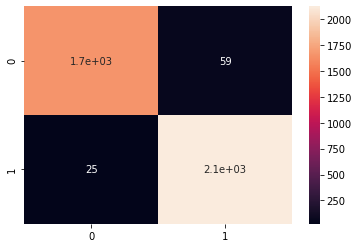

In [ ]:
svcmatrix = confusion_matrix(y_test, ypred_svc)
sns.heatmap(svcmatrix, annot=True)
svcmatrix

In [ ]:
ypred_linearsvc = linearsvc_modeltest2[8].predict(x_test)

array([[1546,  176],
       [ 106, 2042]])

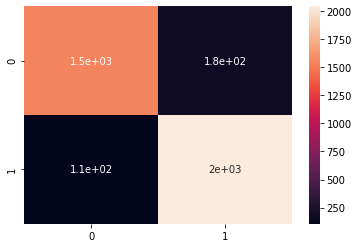

In [ ]:
linearsvcmatrix = confusion_matrix(y_test, ypred_linearsvc)
sns.heatmap(linearsvcmatrix, annot=True)
linearsvcmatrix

In [ ]:
ypred_bnb = bnbmodelstest2[1].predict(x_test)

array([[1555,  167],
       [ 193, 1955]])

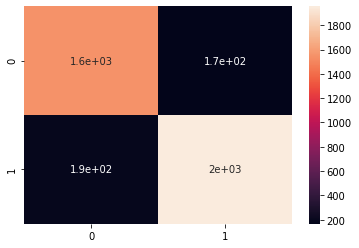

In [ ]:
bnbmatrix = confusion_matrix(y_test, ypred_bnb)
sns.heatmap(bnbmatrix, annot=True)
bnbmatrix

In [ ]:
ypred_randomforest = RandomForestClassifier(warm_start = False, class_weight=None, max_features = 'auto' , criterion = 'entropy').fit(x_train, y_train).predict(x_test)

array([[1639,   83],
       [  41, 2107]])

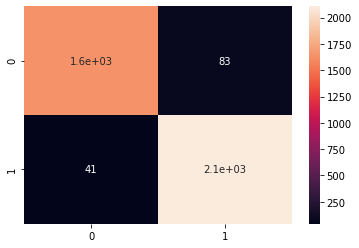

In [ ]:
randommatrix = confusion_matrix(y_test, ypred_randomforest)
sns.heatmap(randommatrix, annot=True)
randommatrix

In [ ]:
ypred_dtree = DecisionTreeClassifier(class_weight = None, max_features=None, splitter = 'random', criterion = 'entropy').fit(x_train, y_train).predict(x_test)

array([[1636,   86],
       [  68, 2080]])

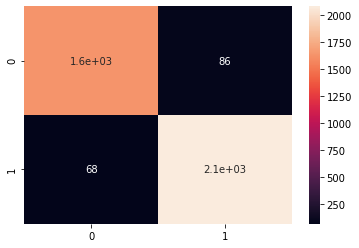

In [ ]:
dtreematrix = confusion_matrix(y_test, ypred_dtree)
sns.heatmap(dtreematrix, annot=True)
dtreematrix

In [ ]:
ypred_gaussian = gaustest2.predict(x_test)

array([[1719,    3],
       [1540,  608]])

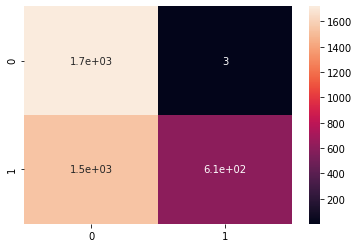

In [ ]:
gausmatrix = confusion_matrix(y_test, ypred_gaussian)
sns.heatmap(gausmatrix, annot=True)
gausmatrix

In [ ]:
ypred_knn = knntest2[145].predict(x_test)

array([[1680,   42],
       [  24, 2124]])

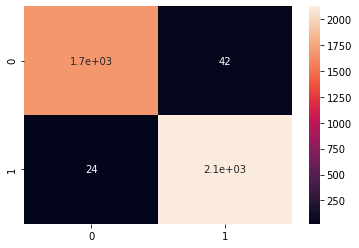

In [ ]:
knnmatrix = confusion_matrix(y_test, ypred_knn)
sns.heatmap(knnmatrix, annot=True)
knnmatrix

In [ ]:
test_sizes

[0.15, 0.2, 0.3, 0.35]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df[df.columns[:-1]],df[df.columns[-1]], test_size = test_sizes[0])
x_train = np.array(x_train).astype(np.int8)
y_train = np.array(y_train).astype(np.int8)
x_test = np.array(x_test).astype(np.int8)
y_test = np.array(y_test).astype(np.int8)
y_train = np.where(y_train == -1, 0, y_train)
y_test = np.where(y_test == -1, 0, y_test)
x_train_cat = to_categorical(x_train)
x_test_cat = to_categorical(x_test)

In [ ]:
opt = keras.optimizers.SGD(lr=0.001, momentum=0.9)
loss_fn = keras.losses.Huber(delta=1.0)
activation = ['softplus', 'softsign', 'selu', 'elu', 'exponential', 'tanh', 'sigmoid', 'relu']
optimizers = ['sgd', 'rmsprop', 'adam', 'adadelta', 'adagrad', 'adamax', 'nadam', 'ftrl', opt]
binary_loss = ['binary_crossentropy', 'hinge', 'squared_hinge', loss_fn]

In [ ]:
x_train_cat.shape

(9396, 30, 2)

In [ ]:
keras_models = []
for acti in activation:
  model = keras.Sequential()
  model.add(Dense(32, activation='relu',input_shape=(30,2)))
  model.add(Dense(64,activation='relu'))
  model.add(Dense(32,activation='relu'))
  model.add(Dense(1,activation=acti))
  keras_models.append(model)

In [ ]:
model_hist = []
for m in keras_models:
  for opt in optimizers:
    for loss in binary_loss:
      m.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
      modelhistory = m.fit(x_train_cat, y_train, epochs = 7, validation_data=(x_test_cat, y_test))
      acc = [modelhistory.history['accuracy'], modelhistory.history['val_accuracy']]
      model_hist.append(acc)

In [ ]:
model_hist

In [ ]:
history = np.array(model_hist)

In [ ]:
history.shape

(288, 2, 7)

In [ ]:
accuracy = history[:,0,:]
validation_accuracy = history[:,1,:]

In [ ]:
accuracy.shape

(288, 7)

In [ ]:
best_acc = []
best_val_acc = []
for arr in accuracy:
  best_acc.append(arr[np.argmax(arr)])

for arr in validation_accuracy:
  best_val_acc.append(arr[np.argmax(arr)])

In [ ]:
best_acc[np.argmax(best_acc)], np.argmax(best_acc), np.argmin(best_acc), best_acc[np.argmin(best_acc)], np.sum(best_acc) / len(best_acc)

(0.5598942637443542, 59, 35, 0.4404001832008362, 0.5292846961981721)

In [ ]:
best_val_acc[np.argmax(best_val_acc)], np.argmax(best_val_acc), np.argmin(best_val_acc), best_val_acc[np.argmin(best_val_acc)], np.sum(best_val_acc) / len(best_val_acc)

(0.5418927073478699, 0, 2, 0.4581072926521301, 0.5174300382948585)

In [ ]:
i = 0
for acti in activation:
  for m in keras_models:
    for opt in optimizers:
      for loss in binary_loss:
        if i == 0 or i == 2 or i == 35 or i == 59:
          print(acti, opt, loss)
        i+=1

softplus sgd binary_crossentropy
softplus sgd squared_hinge
softplus <tensorflow.python.keras.optimizer_v2.gradient_descent.SGD object at 0x7f95fda4e1d0> <tensorflow.python.keras.losses.Huber object at 0x7f95fda4ea10>
softplus adamax <tensorflow.python.keras.losses.Huber object at 0x7f95fda4ea10>


In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

In [ ]:
keras_models = []
for acti in activation:
  model = keras.Sequential()
  model.add(Dense(64, kernel_regularizer=l2(0.0001), activation='relu',input_shape=(30,2)))
  model.add(Dense(128, kernel_regularizer=l2(0.0001), activation='relu'))
  model.add(Dense(256, kernel_regularizer=l2(0.0001), activation='relu'))
  model.add(Dense(512, kernel_regularizer=l2(0.0001), activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(1,activation=acti))
  keras_models.append(model)

In [ ]:
model_hist = []
for m in keras_models:
  for opt in optimizers:
    for loss in binary_loss:
      m.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
      modelhistory = m.fit(x_train_cat, y_train, epochs = 9, validation_data=(x_test_cat, y_test))
      acc = [modelhistory.history['accuracy'], modelhistory.history['val_accuracy']]
      model_hist.append(acc)

Epoch 1/9
294/294 [==============================] - 8s 26ms/step - loss: 0.7518 - accuracy: 0.5646 - val_loss: 0.7500 - val_accuracy: 0.5419
Epoch 2/9
294/294 [==============================] - 8s 26ms/step - loss: 0.7468 - accuracy: 0.5606 - val_loss: 0.7498 - val_accuracy: 0.5419
Epoch 3/9
294/294 [==============================] - 7s 25ms/step - loss: 0.7459 - accuracy: 0.5625 - val_loss: 0.7498 - val_accuracy: 0.5419
Epoch 4/9
294/294 [==============================] - 7s 25ms/step - loss: 0.7464 - accuracy: 0.5586 - val_loss: 0.7496 - val_accuracy: 0.5419
Epoch 5/9
294/294 [==============================] - 8s 26ms/step - loss: 0.7449 - accuracy: 0.5651 - val_loss: 0.7493 - val_accuracy: 0.5419
Epoch 6/9
294/294 [==============================] - 7s 25ms/step - loss: 0.7467 - accuracy: 0.5568 - val_loss: 0.7495 - val_accuracy: 0.5419
Epoch 7/9
294/294 [==============================] - 7s 25ms/step - loss: 0.7463 - accuracy: 0.5577 - val_loss: 0.7492 - val_accuracy: 0.5419
Epoch 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df[df.columns[:-1]],df[df.columns[-1]], test_size = test_sizes[0])
x_train = np.array(x_train).astype(np.int8)
y_train = np.array(y_train).astype(np.int8)
x_test = np.array(x_test).astype(np.int8)
y_test = np.array(y_test).astype(np.int8)
y_train = np.where(y_train == -1, 0, y_train)
y_test = np.where(y_test == -1, 0, y_test)
x_train_cat = to_categorical(x_train)
x_test_cat = to_categorical(x_test)
#####################################################
model = keras.Sequential()
model.add(Flatten(input_shape = (30,2)))
model.add(Dense(64,  activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1,activation='softplus'))
######################################################
model_hist = []
for opt in optimizers:
  for loss in binary_loss:
    model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
    modelhistory = model.fit(x_train_cat, y_train, epochs = 7, validation_data=(x_test_cat, y_test))
    acc = [modelhistory.history['accuracy'], modelhistory.history['val_accuracy']]
    model_hist.append(acc)

In [ ]:
accuracy = model_hist[:,0,:]
validation_accuracy = model_hist[:,1,:]

In [ ]:
best_acc = []
best_val_acc = []

for arr in accuracy:
  best_acc.append(arr[np.argmax(arr)])

for arr in validation_accuracy:
  best_val_acc.append(arr[np.argmax(arr)])

In [ ]:
best_acc[np.argmax(best_acc)], np.argmax(best_acc), np.argmin(best_acc), best_acc[np.argmin(best_acc)], np.sum(best_acc) / len(best_acc)

(0.757662832736969, 20, 35, 0.44359302520751953, 0.6904563324318992)

In [ ]:
i = 0
for opt in optimizers:
  for loss in binary_loss:
    if i == 20 or i == 35:
      print(opt, loss)
    i+=1

adamax binary_crossentropy
<tensorflow.python.keras.optimizer_v2.gradient_descent.SGD object at 0x7fedd50e7310> <tensorflow.python.keras.losses.Huber object at 0x7fedd50e73d0>


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df[df.columns[:-1]],df[df.columns[-1]], test_size = test_sizes[3])
x_train = np.array(x_train).astype(np.int8)
y_train = np.array(y_train).astype(np.int8)
x_test = np.array(x_test).astype(np.int8)
y_test = np.array(y_test).astype(np.int8)
y_train = np.where(y_train == -1, 0, y_train)
y_test = np.where(y_test == -1, 0, y_test)
x_train_cat = to_categorical(x_train)
x_test_cat = to_categorical(x_test)
#####################################################
model = keras.Sequential()
model.add(Flatten(input_shape = (30,2)))
model.add(Dense(64,  activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1,activation='softplus'))
######################################################
model_hist = []
for opt in optimizers:
  for loss in binary_loss:
    model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
    modelhistory = model.fit(x_train_cat, y_train, epochs = 7, validation_data=(x_test_cat, y_test))
    acc = [modelhistory.history['accuracy'], modelhistory.history['val_accuracy']]
    model_hist.append(acc)

Epoch 1/7
225/225 [==============================] - 1s 3ms/step - loss: 0.6752 - accuracy: 0.5854 - val_loss: 0.5928 - val_accuracy: 0.7243
Epoch 2/7
225/225 [==============================] - 0s 2ms/step - loss: 0.5832 - accuracy: 0.7175 - val_loss: 0.5420 - val_accuracy: 0.7424
Epoch 3/7
225/225 [==============================] - 0s 2ms/step - loss: 0.5926 - accuracy: 0.7182 - val_loss: 0.6335 - val_accuracy: 0.7165
Epoch 4/7
225/225 [==============================] - 0s 2ms/step - loss: 0.6099 - accuracy: 0.6996 - val_loss: 0.5530 - val_accuracy: 0.7398
Epoch 5/7
225/225 [==============================] - 0s 2ms/step - loss: 0.5531 - accuracy: 0.7306 - val_loss: 0.5341 - val_accuracy: 0.7478
Epoch 6/7
225/225 [==============================] - 0s 2ms/step - loss: 0.5432 - accuracy: 0.7260 - val_loss: 0.5184 - val_accuracy: 0.7543
Epoch 7/7
225/225 [==============================] - 1s 2ms/step - loss: 0.5286 - accuracy: 0.7420 - val_loss: 0.5261 - val_accuracy: 0.7341
Epoch 1/7
225

In [ ]:
model_hist = np.array(model_hist)
accuracy = model_hist[:,0,:]
validation_accuracy = model_hist[:,1,:]
best_acc = []
best_val_acc = []

for arr in accuracy:
  best_acc.append(arr[np.argmax(arr)])

for arr in validation_accuracy:
  best_val_acc.append(arr[np.argmax(arr)])

In [ ]:
best_acc[np.argmax(best_acc)], np.argmax(best_acc), np.argmin(best_acc), best_acc[np.argmin(best_acc)], np.sum(best_acc) / len(best_acc)

(0.7550452351570129, 20, 35, 0.4431454539299011, 0.6915487531158659)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df[df.columns[:-1]],df[df.columns[-1]], test_size = test_sizes[3])
x_train = np.array(x_train).astype(np.int8)
y_train = np.array(y_train).astype(np.int8)
x_test = np.array(x_test).astype(np.int8)
y_test = np.array(y_test).astype(np.int8)
y_train = np.where(y_train == -1, 0, y_train)
y_test = np.where(y_test == -1, 0, y_test)
x_train_cat = to_categorical(x_train)
x_test_cat = to_categorical(x_test)
#####################################################
model = keras.Sequential()
model.add(Flatten(input_shape = (30,2)))
model.add(Dense(64, kernel_regularizer=l2(0.0001),  activation='relu'))
model.add(Dense(128, kernel_regularizer=l2(0.0001), activation='relu'))
model.add(Dense(128, kernel_regularizer=l2(0.0001), activation='relu'))
model.add(Dense(1,activation='softplus'))
######################################################
model_hist = []
for opt in optimizers:
  for loss in binary_loss:
    model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
    modelhistory = model.fit(x_train_cat, y_train, epochs = 7, validation_data=(x_test_cat, y_test))
    acc = [modelhistory.history['accuracy'], modelhistory.history['val_accuracy']]
    model_hist.append(acc)

Epoch 1/7
225/225 [==============================] - 1s 3ms/step - loss: 0.6634 - accuracy: 0.6385 - val_loss: 0.6303 - val_accuracy: 0.7227
Epoch 2/7
225/225 [==============================] - 0s 2ms/step - loss: 0.5907 - accuracy: 0.7377 - val_loss: 0.5747 - val_accuracy: 0.7357
Epoch 3/7
225/225 [==============================] - 0s 2ms/step - loss: 0.5696 - accuracy: 0.7395 - val_loss: 0.6781 - val_accuracy: 0.7382
Epoch 4/7
225/225 [==============================] - 0s 2ms/step - loss: 0.6005 - accuracy: 0.7274 - val_loss: 0.5759 - val_accuracy: 0.7351
Epoch 5/7
225/225 [==============================] - 0s 2ms/step - loss: 0.5607 - accuracy: 0.7456 - val_loss: 0.5588 - val_accuracy: 0.7372
Epoch 6/7
225/225 [==============================] - 0s 2ms/step - loss: 0.5718 - accuracy: 0.7292 - val_loss: 0.6082 - val_accuracy: 0.7341
Epoch 7/7
225/225 [==============================] - 0s 2ms/step - loss: 0.5779 - accuracy: 0.7490 - val_loss: 0.5600 - val_accuracy: 0.7359
Epoch 1/7
225

In [ ]:
model_hist = np.array(model_hist)
accuracy = model_hist[:,0,:]
validation_accuracy = model_hist[:,1,:]
best_acc = []
best_val_acc = []

for arr in accuracy:
  best_acc.append(arr[np.argmax(arr)])

for arr in validation_accuracy:
  best_val_acc.append(arr[np.argmax(arr)])

In [ ]:
best_acc[np.argmax(best_acc)], np.argmax(best_acc), np.argmin(best_acc), best_acc[np.argmin(best_acc)], np.sum(best_acc) / len(best_acc)

(0.7620041966438293, 27, 35, 0.44551149010658264, 0.6962924326459566)

In [ ]:
i = 0
for opt in optimizers:
  for loss in binary_loss:
    if i == 27 or i == 35:
      print(opt, loss)
    i+=1

nadam <tensorflow.python.keras.losses.Huber object at 0x7fedd50e73d0>
<tensorflow.python.keras.optimizer_v2.gradient_descent.SGD object at 0x7fedd50e7310> <tensorflow.python.keras.losses.Huber object at 0x7fedd50e73d0>


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df[df.columns[:-1]],df[df.columns[-1]], test_size = test_sizes[3])
x_train = np.array(x_train).astype(np.int8)
y_train = np.array(y_train).astype(np.int8)
x_test = np.array(x_test).astype(np.int8)
y_test = np.array(y_test).astype(np.int8)
y_train = np.where(y_train == -1, 0, y_train)
y_test = np.where(y_test == -1, 0, y_test)
x_train_cat = to_categorical(x_train)
x_test_cat = to_categorical(x_test)
#####################################################
model = keras.Sequential()
model.add(Flatten(input_shape = (30,2)))
model.add(Dense(64, kernel_regularizer=l2(0.0001),  activation='relu'))
model.add(Dense(128, kernel_regularizer=l2(0.0001), activation='relu'))
model.add(Dense(128, kernel_regularizer=l2(0.0001), activation='relu'))
model.add(Dense(128, kernel_regularizer=l2(0.0001), activation='relu'))
model.add(Dense(256, kernel_regularizer=l2(0.0001), activation='relu'))
model.add(Dense(1,activation='softplus'))
######################################################
model_hist = []
for opt in optimizers:
  for loss in binary_loss:
    model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
    modelhistory = model.fit(x_train_cat, y_train, epochs = 7, validation_data=(x_test_cat, y_test))
    acc = [modelhistory.history['accuracy'], modelhistory.history['val_accuracy']]
    model_hist.append(acc)

Epoch 1/7
225/225 [==============================] - 2s 4ms/step - loss: 0.7221 - accuracy: 0.5899 - val_loss: 0.6361 - val_accuracy: 0.7478
Epoch 2/7
225/225 [==============================] - 1s 3ms/step - loss: 0.6235 - accuracy: 0.7301 - val_loss: 0.6545 - val_accuracy: 0.6287
Epoch 3/7
225/225 [==============================] - 1s 3ms/step - loss: 0.6093 - accuracy: 0.7238 - val_loss: 0.6139 - val_accuracy: 0.6817
Epoch 4/7
225/225 [==============================] - 1s 3ms/step - loss: 0.5879 - accuracy: 0.7379 - val_loss: 0.5856 - val_accuracy: 0.7519
Epoch 5/7
225/225 [==============================] - 1s 3ms/step - loss: 0.5908 - accuracy: 0.7394 - val_loss: 0.5746 - val_accuracy: 0.7504
Epoch 6/7
225/225 [==============================] - 1s 3ms/step - loss: 0.5843 - accuracy: 0.7322 - val_loss: 0.5723 - val_accuracy: 0.7519
Epoch 7/7
225/225 [==============================] - 1s 3ms/step - loss: 0.5895 - accuracy: 0.7295 - val_loss: 0.5677 - val_accuracy: 0.7553
Epoch 1/7
225

In [ ]:
model_hist = np.array(model_hist)
accuracy = model_hist[:,0,:]
validation_accuracy = model_hist[:,1,:]
best_acc = []
best_val_acc = []

for arr in accuracy:
  best_acc.append(arr[np.argmax(arr)])

for arr in validation_accuracy:
  best_val_acc.append(arr[np.argmax(arr)])

print(best_acc[np.argmax(best_acc)], np.argmax(best_acc), np.argmin(best_acc), best_acc[np.argmin(best_acc)], np.sum(best_acc) / len(best_acc))

i = 0
for opt in optimizers:
  for loss in binary_loss:
    if i == 20 or i == 35:
      print(opt, loss)
    i+=1

0.7540709972381592 20 35 0.4434238076210022 0.6896041118436389
adamax binary_crossentropy
<tensorflow.python.keras.optimizer_v2.gradient_descent.SGD object at 0x7fedd50e7310> <tensorflow.python.keras.losses.Huber object at 0x7fedd50e73d0>


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df[df.columns[:-1]],df[df.columns[-1]], test_size = test_sizes[0])
x_train = np.array(x_train).astype(np.int8)
y_train = np.array(y_train).astype(np.int8)
x_test = np.array(x_test).astype(np.int8)
y_test = np.array(y_test).astype(np.int8)
y_train = np.where(y_train == -1, 0, y_train)
y_test = np.where(y_test == -1, 0, y_test)
x_train_cat = to_categorical(x_train)
x_test_cat = to_categorical(x_test)
#####################################################
model = keras.Sequential()
model.add(Flatten(input_shape = (30,2)))
model.add(Dense(64, kernel_regularizer=l2(0.0001),  activation='relu'))
model.add(Dense(128, kernel_regularizer=l2(0.0001), activation='relu'))
model.add(Dense(128, kernel_regularizer=l2(0.0001), activation='relu'))
model.add(Dense(128, kernel_regularizer=l2(0.0001), activation='relu'))
model.add(Dense(256, kernel_regularizer=l2(0.0001), activation='relu'))
model.add(Dense(1,activation='softplus'))
######################################################
model_hist = []
for opt in optimizers:
  for loss in binary_loss:
    model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
    modelhistory = model.fit(x_train_cat, y_train, epochs = 7, validation_data=(x_test_cat, y_test))
    acc = [modelhistory.history['accuracy'], modelhistory.history['val_accuracy']]
    model_hist.append(acc)

Epoch 1/7
294/294 [==============================] - 2s 3ms/step - loss: 0.7330 - accuracy: 0.5741 - val_loss: 0.6413 - val_accuracy: 0.7101
Epoch 2/7
294/294 [==============================] - 1s 3ms/step - loss: 0.6244 - accuracy: 0.7326 - val_loss: 0.5990 - val_accuracy: 0.7378
Epoch 3/7
294/294 [==============================] - 1s 3ms/step - loss: 0.5970 - accuracy: 0.7377 - val_loss: 0.5852 - val_accuracy: 0.7420
Epoch 4/7
294/294 [==============================] - 1s 3ms/step - loss: 0.7299 - accuracy: 0.6753 - val_loss: 0.6302 - val_accuracy: 0.7191
Epoch 5/7
294/294 [==============================] - 1s 3ms/step - loss: 0.6056 - accuracy: 0.7279 - val_loss: 0.5877 - val_accuracy: 0.7336
Epoch 6/7
294/294 [==============================] - 1s 3ms/step - loss: 0.5836 - accuracy: 0.7432 - val_loss: 0.5970 - val_accuracy: 0.7354
Epoch 7/7
294/294 [==============================] - 1s 3ms/step - loss: 0.5801 - accuracy: 0.7431 - val_loss: 0.6193 - val_accuracy: 0.6950
Epoch 1/7
294

In [ ]:
model_hist = np.array(model_hist)
accuracy = model_hist[:,0,:]
validation_accuracy = model_hist[:,1,:]
best_acc = []
best_val_acc = []

for arr in accuracy:
  best_acc.append(arr[np.argmax(arr)])

for arr in validation_accuracy:
  best_val_acc.append(arr[np.argmax(arr)])

print(best_acc[np.argmax(best_acc)], np.argmax(best_acc), np.argmin(best_acc), best_acc[np.argmin(best_acc)], np.sum(best_acc) / len(best_acc))

i = 0
for opt in optimizers:
  for loss in binary_loss:
    if i == 11 or i == 35:
      print(opt, loss)
    i+=1

0.7579821348190308 11 35 0.4416773021221161 0.6929869676629702
adam <tensorflow.python.keras.losses.Huber object at 0x7fedd50e73d0>
<tensorflow.python.keras.optimizer_v2.gradient_descent.SGD object at 0x7fedd50e7310> <tensorflow.python.keras.losses.Huber object at 0x7fedd50e73d0>


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df[df.columns[:-1]],df[df.columns[-1]], test_size = test_sizes[0])
x_train = np.array(x_train).astype(np.int8)
y_train = np.array(y_train).astype(np.int8)
x_test = np.array(x_test).astype(np.int8)
y_test = np.array(y_test).astype(np.int8)
y_train = np.where(y_train == -1, 0, y_train)
y_test = np.where(y_test == -1, 0, y_test)
x_train_cat = to_categorical(x_train)
x_test_cat = to_categorical(x_test)
#####################################################
model = keras.Sequential()
model.add(Dense(64, kernel_regularizer=l2(0.0001), input_shape = (30,2),  activation='relu'))
model.add(Dense(128, kernel_regularizer=l2(0.0001), activation='relu'))
model.add(Dense(128, kernel_regularizer=l2(0.0001), activation='relu'))
model.add(Dense(128, kernel_regularizer=l2(0.0001), activation='relu'))
model.add(Dense(256, kernel_regularizer=l2(0.0001), activation='relu'))
model.add(Dense(1,activation='softplus'))
######################################################
model_hist = []
for opt in optimizers:
  for loss in binary_loss:
    model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
    modelhistory = model.fit(x_train_cat, y_train, epochs = 7, validation_data=(x_test_cat, y_test))
    acc = [modelhistory.history['accuracy'], modelhistory.history['val_accuracy']]
    model_hist.append(acc)

In [ ]:
model_hist = np.array(model_hist)
accuracy = model_hist[:,0,:]
validation_accuracy = model_hist[:,1,:]
best_acc = []
best_val_acc = []

for arr in accuracy:
  best_acc.append(arr[np.argmax(arr)])

for arr in validation_accuracy:
  best_val_acc.append(arr[np.argmax(arr)])

print(best_acc[np.argmax(best_acc)], np.argmax(best_acc), np.argmin(best_acc), best_acc[np.argmin(best_acc)], np.sum(best_acc) / len(best_acc))

i = 0
for opt in optimizers:
  for loss in binary_loss:
    if i == 0 or i == 2:
      print(opt, loss)
    i+=1

0.557045578956604 0 2 0.4785405099391937 0.5532639273575374
sgd binary_crossentropy
sgd squared_hinge


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df[df.columns[:-1]],df[df.columns[-1]], test_size = test_sizes[0])
x_train = np.array(x_train).astype(np.int8)
y_train = np.array(y_train).astype(np.int8)
x_test = np.array(x_test).astype(np.int8)
y_test = np.array(y_test).astype(np.int8)
y_train = np.where(y_train == -1, 0, y_train)
y_test = np.where(y_test == -1, 0, y_test)
#####################################################
model = keras.Sequential()
model.add(Dense(64, kernel_regularizer=l2(0.0001), input_shape = (30,),  activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128,  activation='relu'))
model.add(Dense(1,activation='softplus'))
######################################################
model_hist = []
for opt in optimizers:
  for loss in binary_loss:
    model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
    modelhistory = model.fit(x_train, y_train, epochs = 7, validation_data=(x_test, y_test))
    acc = [modelhistory.history['accuracy'], modelhistory.history['val_accuracy']]
    model_hist.append(acc)

Epoch 1/7
294/294 [==============================] - 1s 3ms/step - loss: 0.5282 - accuracy: 0.7510 - val_loss: 0.3331 - val_accuracy: 0.9066
Epoch 2/7
294/294 [==============================] - 1s 2ms/step - loss: 7.5704 - accuracy: 0.5038 - val_loss: 8.9044 - val_accuracy: 0.4231
Epoch 3/7
294/294 [==============================] - 1s 2ms/step - loss: 8.6361 - accuracy: 0.4405 - val_loss: 8.9044 - val_accuracy: 0.4231
Epoch 4/7
294/294 [==============================] - 1s 2ms/step - loss: 8.4928 - accuracy: 0.4498 - val_loss: 8.9044 - val_accuracy: 0.4231
Epoch 5/7
294/294 [==============================] - 1s 2ms/step - loss: 8.4527 - accuracy: 0.4524 - val_loss: 8.9044 - val_accuracy: 0.4231
Epoch 6/7
294/294 [==============================] - 1s 2ms/step - loss: 8.5865 - accuracy: 0.4438 - val_loss: 8.9044 - val_accuracy: 0.4231
Epoch 7/7
294/294 [==============================] - 1s 2ms/step - loss: 8.5467 - accuracy: 0.4463 - val_loss: 8.9044 - val_accuracy: 0.4231
Epoch 1/7
294

In [ ]:
model_hist = np.array(model_hist)
accuracy = model_hist[:,0,:]
validation_accuracy = model_hist[:,1,:]
best_acc = []
best_val_acc = []

for arr in accuracy:
  best_acc.append(arr[np.argmax(arr)])

for arr in validation_accuracy:
  best_val_acc.append(arr[np.argmax(arr)])

print(best_acc[np.argmax(best_acc)], np.argmax(best_acc), np.argmin(best_acc), best_acc[np.argmin(best_acc)], np.sum(best_acc) / len(best_acc))

i = 0
for opt in optimizers:
  for loss in binary_loss:
    if i == 23 or i == 1:
      print(opt, loss)
    i+=1

0.9878671765327454 23 1 0.44657301902770996 0.8289490822288725
sgd hinge
adamax <tensorflow.python.keras.losses.Huber object at 0x7fedd50e73d0>


In [ ]:
i = 0
index = []
for arr in accuracy:
  if (np.sum(arr)/len(arr)) > 0.8:
    print(i)
    index.append(i)
  i+=1

4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27


In [ ]:
i = 0
for opt in optimizers:
  for loss in binary_loss:
    if i in index:
      print(opt, loss)
    i+=1

rmsprop binary_crossentropy
rmsprop hinge
rmsprop squared_hinge
rmsprop <tensorflow.python.keras.losses.Huber object at 0x7fedd50e73d0>
adam binary_crossentropy
adam hinge
adam squared_hinge
adam <tensorflow.python.keras.losses.Huber object at 0x7fedd50e73d0>
adadelta binary_crossentropy
adadelta hinge
adadelta squared_hinge
adadelta <tensorflow.python.keras.losses.Huber object at 0x7fedd50e73d0>
adagrad binary_crossentropy
adagrad hinge
adagrad squared_hinge
adagrad <tensorflow.python.keras.losses.Huber object at 0x7fedd50e73d0>
adamax binary_crossentropy
adamax hinge
adamax squared_hinge
adamax <tensorflow.python.keras.losses.Huber object at 0x7fedd50e73d0>
nadam binary_crossentropy
nadam hinge
nadam squared_hinge
nadam <tensorflow.python.keras.losses.Huber object at 0x7fedd50e73d0>


In [ ]:
i = 0
for opt in optimizers:
  for loss in binary_loss:
    if i not in index:
      print(opt, loss)
    i+=1

sgd binary_crossentropy
sgd hinge
sgd squared_hinge
sgd <tensorflow.python.keras.losses.Huber object at 0x7fedd50e73d0>
ftrl binary_crossentropy
ftrl hinge
ftrl squared_hinge
ftrl <tensorflow.python.keras.losses.Huber object at 0x7fedd50e73d0>
<tensorflow.python.keras.optimizer_v2.gradient_descent.SGD object at 0x7fedd50e7310> binary_crossentropy
<tensorflow.python.keras.optimizer_v2.gradient_descent.SGD object at 0x7fedd50e7310> hinge
<tensorflow.python.keras.optimizer_v2.gradient_descent.SGD object at 0x7fedd50e7310> squared_hinge
<tensorflow.python.keras.optimizer_v2.gradient_descent.SGD object at 0x7fedd50e7310> <tensorflow.python.keras.losses.Huber object at 0x7fedd50e73d0>


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df[df.columns[:-1]],df[df.columns[-1]], test_size = test_sizes[0])
x_train = np.array(x_train).astype(np.int8)
y_train = np.array(y_train).astype(np.int8)
x_test = np.array(x_test).astype(np.int8)
y_test = np.array(y_test).astype(np.int8)
y_train = np.where(y_train == -1, 0, y_train)
y_test = np.where(y_test == -1, 0, y_test)
x_train_cat = to_categorical(x_train)
x_test_cat = to_categorical(x_test)

In [ ]:
keras_models = []
for acti in activation:
  model = keras.Sequential()
  model.add(Dense(64, kernel_regularizer=l2(0.0001), input_shape = (30,),  activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(128,  activation='relu'))
  model.add(Dense(1,activation=acti))
  keras_models.append(model)


In [ ]:
model_hist = []
for m in keras_models:
  for opt in optimizers:
    for loss in binary_loss:
      m.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
      modelhistory = m.fit(x_train, y_train, epochs = 7, validation_data=(x_test, y_test))
      acc = [modelhistory.history['accuracy'], modelhistory.history['val_accuracy']]
      model_hist.append(acc)

In [ ]:
len(activation), len(optimizers), len(binary_loss)

(8, 9, 4)

In [ ]:
accuracy = model_hist[:,0,:]
validation_accuracy = model_hist[:,1,:]
best_acc = []
best_val_acc = []

for arr in accuracy:
  best_acc.append(arr[np.argmax(arr)])

for arr in validation_accuracy:
  best_val_acc.append(arr[np.argmax(arr)])


In [ ]:
print(best_acc[np.argmax(best_acc)], np.argmax(best_acc), np.argmin(best_acc), best_acc[np.argmin(best_acc)], np.sum(best_acc) / len(best_acc))

0.988612174987793 92 35 0.44231587648391724 0.8142538494947884


In [ ]:
i = 0
while i != len(activation):
  print(activation[i],np.sum(accuracy[i*36:(i+1)*36, :])/252)
  i+=1

softplus 0.8715419272581736
softsign 0.8436281566345503
selu 0.8545340980802264
elu 0.841758481448605
exponential 0.8724347416843686
tanh 0.8480478846837604
sigmoid 0.8700316594470114
relu 0.44726648027934723


In [ ]:
i = 0
for acti in activation:
  for opt in optimizers:
    for loss in binary_loss:
      if i == 92 or i == 35:
        print(acti, opt, loss)
      i+=1

softplus <tensorflow.python.keras.optimizer_v2.gradient_descent.SGD object at 0x7f5ecfb89450> <tensorflow.python.keras.losses.Huber object at 0x7f5ecfb89510>
selu adamax binary_crossentropy


In [ ]:
activation, optimizers, binary_loss

(['softplus',
  'softsign',
  'selu',
  'elu',
  'exponential',
  'tanh',
  'sigmoid',
  'relu'],
 ['sgd',
  'rmsprop',
  'adam',
  'adadelta',
  'adagrad',
  'adamax',
  'nadam',
  'ftrl',
 ['binary_crossentropy',
  'hinge',
  'squared_hinge',
  <tensorflow.python.keras.losses.Huber at 0x7f5ecfb89510>])

In [ ]:
a

In [ ]:
df.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5ed0580b50>],
      dtype=object)

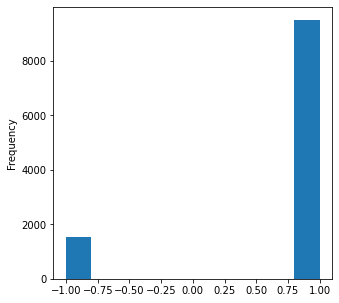

In [ ]:
df.Statistical_report.plot.hist(subplots=True, figsize=(5,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d83b2ff10>],
      dtype=object)

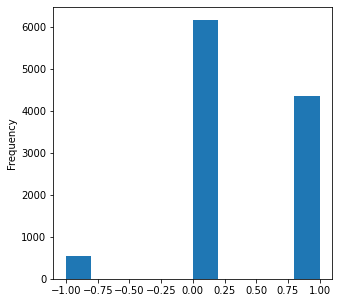

In [ ]:
df.Links_pointing_to_page.plot.hist(subplots=True, figsize=(5,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d91a07550>],
      dtype=object)

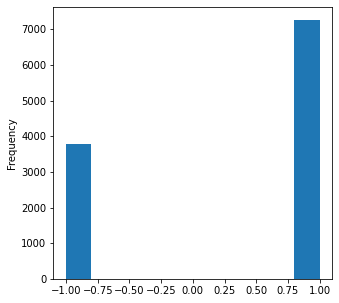

In [ ]:
df.having_IP_Address.plot.hist(subplots=True, figsize=(5,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d84911450>],
      dtype=object)

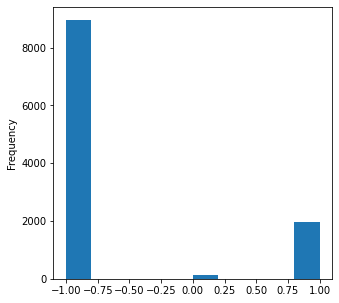

In [ ]:
df.URL_Length.plot.hist(subplots=True, figsize=(5,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d849817d0>],
      dtype=object)

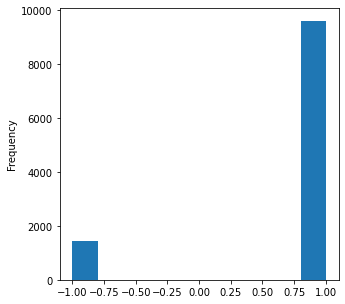

In [ ]:
df.Shortining_Service.plot.hist(subplots=True, figsize=(5,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d87c73950>],
      dtype=object)

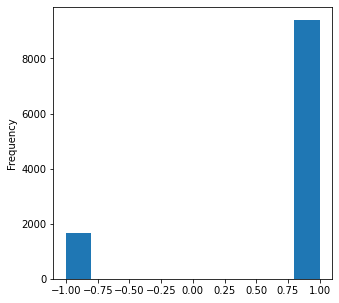

In [ ]:
df.having_At_Symbol.plot.hist(subplots=True, figsize=(5,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d847ad590>],
      dtype=object)

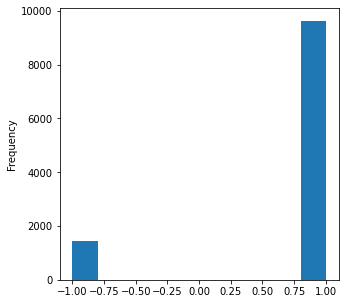

In [ ]:
df.double_slash_redirecting.plot.hist(subplots=True, figsize=(5,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d8472eb50>],
      dtype=object)

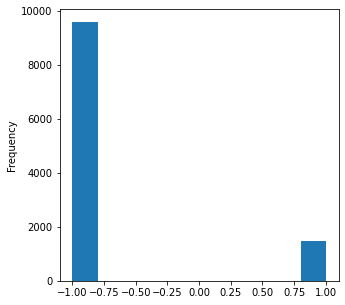

In [ ]:
df.Prefix_Suffix.plot.hist(subplots=True, figsize=(5,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d96058290>],
      dtype=object)

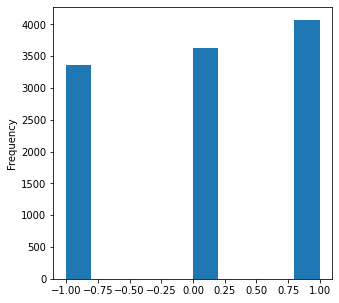

In [ ]:
df.having_Sub_Domain.plot.hist(subplots=True, figsize=(5,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d845cc450>],
      dtype=object)

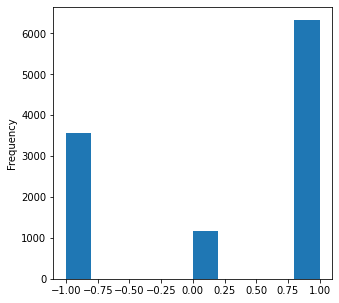

In [ ]:
df.SSLfinal_State.plot.hist(subplots=True, figsize=(5,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5ecfb4a590>],
      dtype=object)

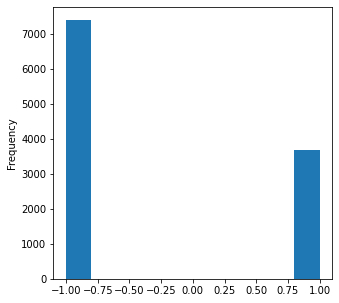

In [ ]:
df.Domain_registeration_length.plot.hist(subplots=True, figsize=(5,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d844eec90>],
      dtype=object)

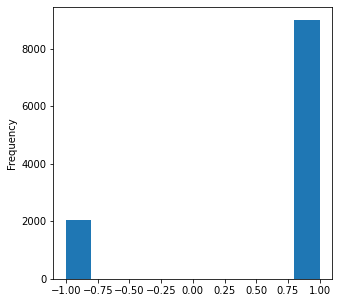

In [ ]:
df.Favicon.plot.hist(subplots=True, figsize=(5,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d8445a290>],
      dtype=object)

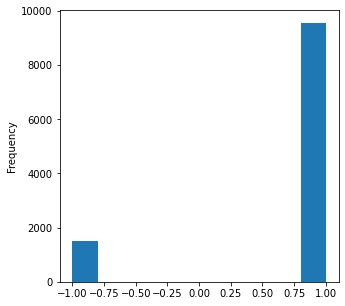

In [ ]:
df.port.plot.hist(subplots=True, figsize=(5,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d843e1850>],
      dtype=object)

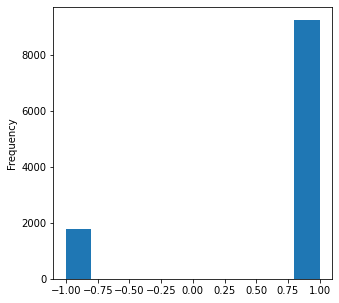

In [ ]:
df.HTTPS_token.plot.hist(subplots=True, figsize=(5,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d8444a710>],
      dtype=object)

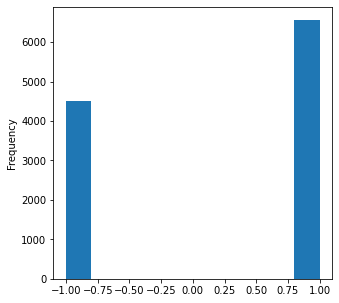

In [ ]:
df.Request_URL.plot.hist(subplots=True, figsize=(5,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d84346190>],
      dtype=object)

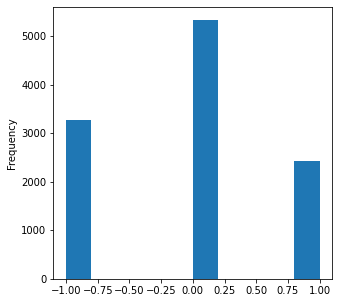

In [ ]:
df.URL_of_Anchor.plot.hist(subplots=True, figsize=(5,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d8444a3d0>],
      dtype=object)

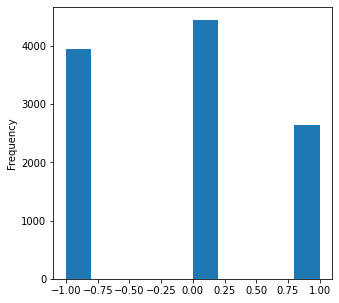

In [ ]:
df.Links_in_tags.plot.hist(subplots=True, figsize=(5,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d841db210>],
      dtype=object)

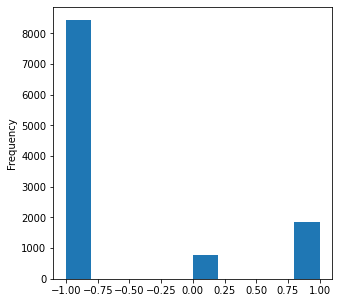

In [ ]:
df.SFH.plot.hist(subplots=True, figsize=(5,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d84114a90>],
      dtype=object)

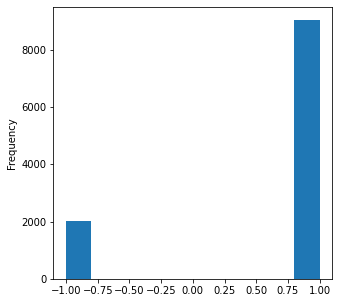

In [ ]:
df.Submitting_to_email.plot.hist(subplots=True, figsize=(5,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d8408ec10>],
      dtype=object)

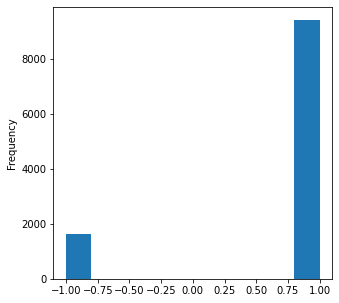

In [ ]:
df.Abnormal_URL.plot.hist(subplots=True, figsize=(5,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d84010ad0>],
      dtype=object)

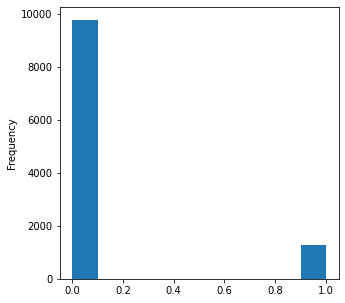

In [ ]:
df.Redirect.plot.hist(subplots=True, figsize=(5,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d84bef690>],
      dtype=object)

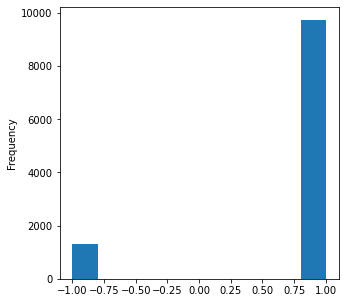

In [ ]:
df.on_mouseover.plot.hist(subplots=True, figsize=(5,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d83f86f90>],
      dtype=object)

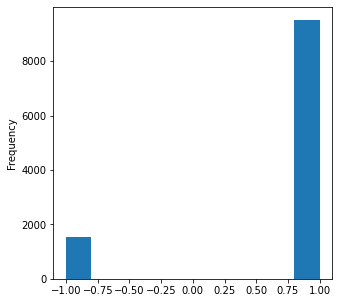

In [ ]:
df.Google_Index.plot.hist(subplots=True, figsize=(5,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d83e8d2d0>],
      dtype=object)

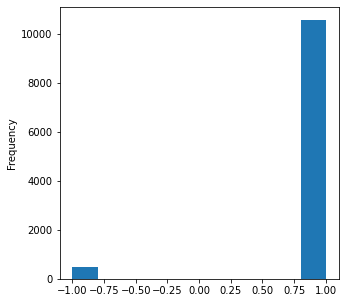

In [ ]:
df.RightClick.plot.hist(subplots=True, figsize=(5,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d83e21f90>],
      dtype=object)

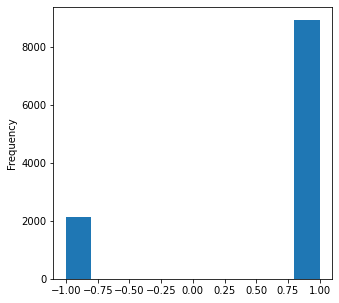

In [ ]:
df.popUpWidnow.plot.hist(subplots=True, figsize=(5,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d83da1f50>],
      dtype=object)

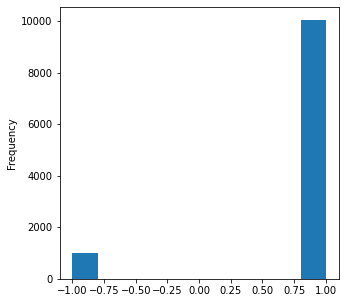

In [ ]:
df.Iframe.plot.hist(subplots=True, figsize=(5,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d8509af50>],
      dtype=object)

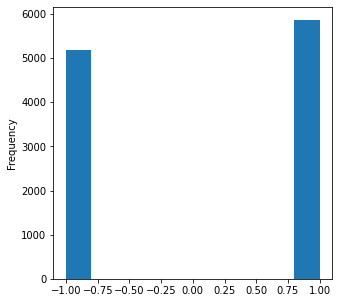

In [ ]:
df.age_of_domain.plot.hist(subplots=True, figsize=(5,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d83e064d0>],
      dtype=object)

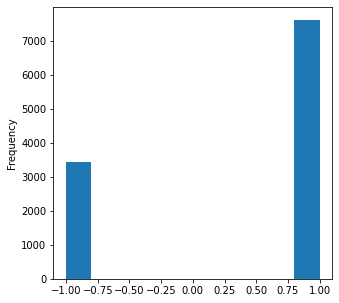

In [ ]:
df.DNSRecord.plot.hist(subplots=True, figsize=(5,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d83c48b50>],
      dtype=object)

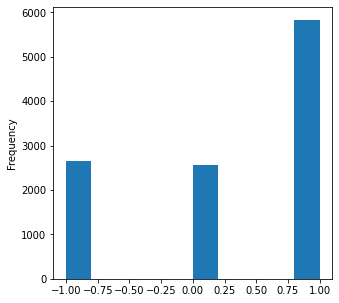

In [ ]:
df.web_traffic.plot.hist(subplots=True, figsize=(5,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d83bc4150>],
      dtype=object)

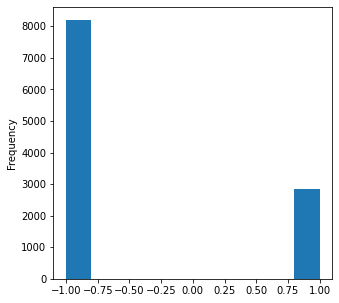

In [ ]:
df.Page_Rank.plot.hist(subplots=True, figsize=(5,5))